In [5]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/usr/local/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/usr/local/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/usr/local/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload', '', '/Users/lizhuoxuan/Documents/coding B1/b1-coding-practical-mt24/.venv/lib/python3.13/site-packages', '/Users/lizhuoxuan/Documents/coding B1/b1-coding-practical-mt24']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

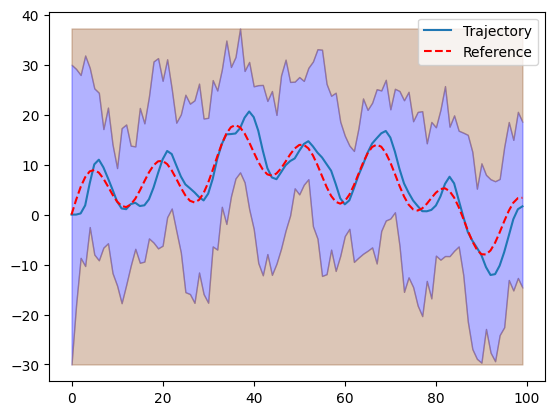

In [7]:
# Import relevant modules
import numpy as np
from uuv_mission.control import PDController
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission

# Create an instance of the Submarine class
sub = Submarine()

# Instantiate the PDController with initial kp and kd values
controller = PDController(kp=0.05, kd=0.7)

# Create an instance of the ClosedLoop class with the submarine and controller
closed_loop = ClosedLoop(sub, controller)

# Load the mission from a CSV file
mission = Mission.from_csv("/Users/lizhuoxuan/Documents/coding B1/b1-coding-practical-mt24/data/mission.csv")

# Simulate the mission with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission)

# Plot the completed mission
trajectory.plot_completed_mission(mission)

Best Parameters: {'kp': np.float64(0.051000000000000004), 'kd': np.float64(0.8799999999999996)}
Best Score: 168.57396657164614


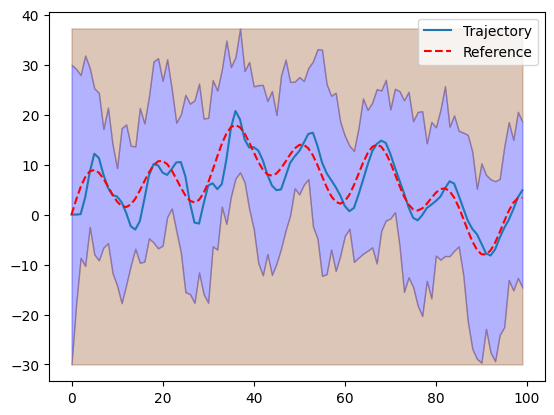

In [8]:
# Define a grid of possible kp and kd values
grid = [{'kp': kp, 'kd': kd} for kp in np.arange(0.001, 0.3, 0.05) for kd in np.arange(0.1, 1.1, 0.01)]

# Initialize variables to store the best parameters and the best score
best_params = None
best_score = float('inf')

# Iterate over each combination of kp and kd in the grid
for params in grid:
    # Update the controller parameters
    controller.kp = params['kp']
    controller.kd = params['kd']

    # Calculate the total error for the current parameters
    total_error = closed_loop.calculate_total_error(mission)
    
    # Update the best parameters if the current total error is lower than the best score
    if total_error < best_score:
        best_score = total_error
        best_params = params

# Print the best parameters and the best score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Create a new controller using the best parameters
new_controller = PDController(kp=best_params['kp'], kd=best_params['kd'])

# Create a new closed loop with the new controller
new_closed_loop = ClosedLoop(sub, new_controller)

# Simulate the mission with the new controller
new_trajectory = new_closed_loop.simulate_with_random_disturbances(mission)

# Plot the completed mission
new_trajectory.plot_completed_mission(mission)